# Machine Learning and Data Analysis
----------------------------------------------
### *Session 5.1*


```
20th October, 2023
Anna Pallarès López
Computer Engineering Master's

```

# Import, adapt and visualize data

In [51]:
from sklearn.datasets import fetch_openml

In [52]:
mnist = fetch_openml('mnist_784')
print(mnist)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

In [55]:
X = mnist.data
Y = mnist.target

In [4]:
type(X)

pandas.core.frame.DataFrame

In [5]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
Y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [56]:
X = X.to_numpy()
Y = Y.to_numpy()

In [8]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
X.shape

(70000, 784)

In [10]:
Y.shape

(70000,)

In [11]:
import numpy as np
np.unique(Y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [57]:
# we need to transfor this array of carachters to array of numbers
Y = np.asarray([eval(i) for i in Y])

In [13]:
print(Y) # we check that are numbers

[5 0 4 ... 4 5 6]


In [14]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


4


(-0.5, 27.5, 27.5, -0.5)

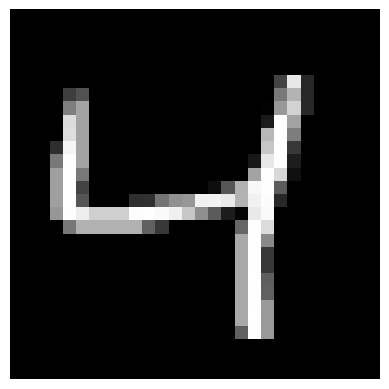

In [58]:
import matplotlib.pyplot as plt

i = 2
picture = np.reshape(X[i,:],(28,28))

print(Y[i])
fig, ax = plt.subplots()
ax.imshow(picture, cmap=plt.cm.gray)
ax.axis('off')

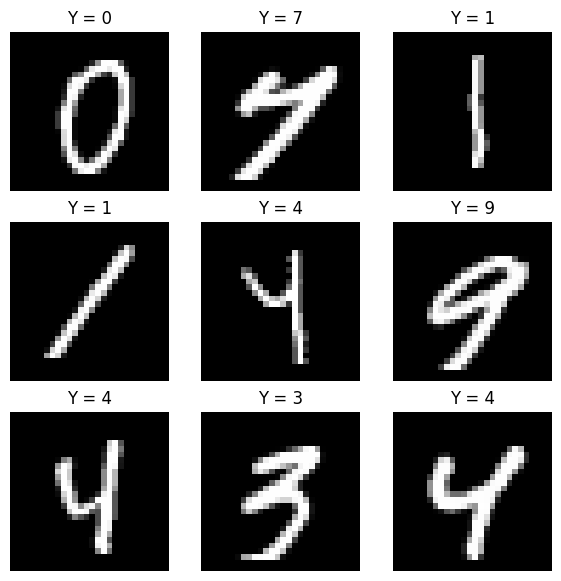

In [60]:
fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(7,7))
i = 1000
for ax in axs.reshape(-1):
  ax.set_title("Y = %d" % Y[i])
  picture = np.reshape(X[i,:],(28,28))
  ax.imshow(picture, cmap=plt.cm.gray)
  ax.axis('off')
  i += 1

In [34]:
np.max(X), np.min(X)

(255.0, 0.0)

In [61]:
for i in range(0,10):
  tmp = sum(Y == i)
  print(tmp)

6903
7877
6990
7141
6824
6313
6876
7293
6825
6958


In [62]:
# negative and positive digits
dn = 0
dp = 1
mask = (Y == dn) | (Y == dp)
X = X[mask, :]
Y = Y[mask]
# the order of assigning first the negative and after the positive is important
# if we don't do i like this, all digits can be assigned to a wrong one
Y[Y == dn] = -1
Y[Y == dp] = +1


In [63]:
X.shape

(14780, 784)

In [64]:
Y.shape

(14780,)

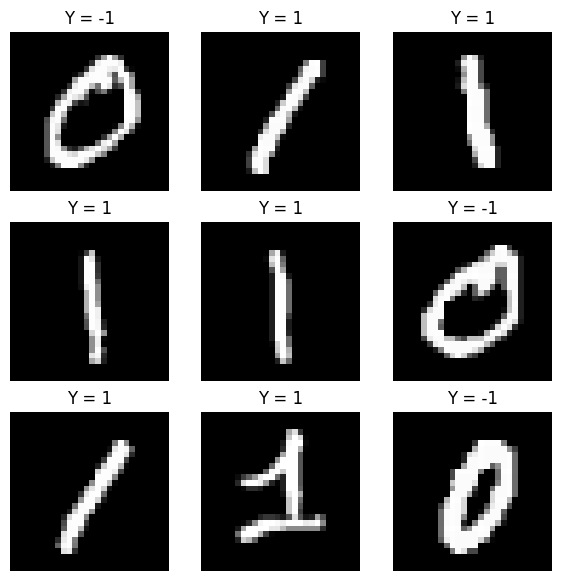

In [65]:
fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(7,7))
i = 0
for ax in axs.reshape(-1):
  ax.set_title("Y = %d" % Y[i])
  picture = np.reshape(X[i,:],(28,28))
  ax.imshow(picture, cmap=plt.cm.gray)
  ax.axis('off')
  i += 1

In [70]:
from random import sample

n = 100
nt = 1000
mask = np.asarray(sample(range(X.shape[0]),n+nt))

X = X[mask,:]
Y = Y[mask]
mask = range(n,n+nt)

Xt = X[mask,]
Yt = Y[mask]
mask = range(0,n)

X = X[mask,]
Y = Y[mask]

print(X.shape)
print(Y.shape)
print(Xt.shape)
print(Yt.shape)

ValueError: ignored

In [72]:
#KISS -> Keep It Simple Stupid
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix

alpha = 1
M = Ridge(alpha = alpha)
M.fit(X,Y)
Yp = M.predict(Xt)
Yp[Yp >= 0] = +1
Yp[Yp < 0]  = -1
err = np.mean(Yp * Yt <= 0)
print(err)
print(confusion_matrix(Yt,Yp))

0.6
[[0 6]
 [0 4]]


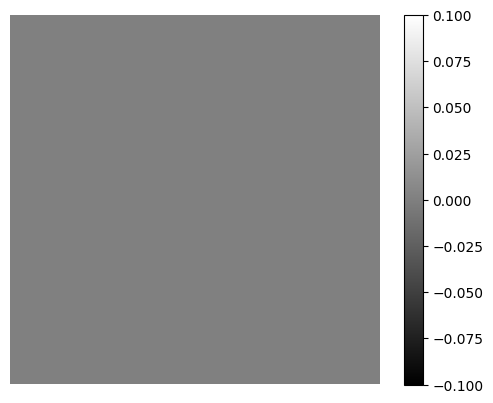

In [73]:
# Ridge -> f(x) = w x + b
# f(x) > 0 -> +1
# f(x) < 0 -> -1
# x  \in [0,255]
# w > 0 -> means that that pixel contributes to tell that the picture will be labeled as +1 (so digit 1)
# w < 0 -> means that that pixel contributes to tell that the picture will be labeled as -1 (so digit 0)

w = M.coef_
picture = np.reshape(w,(28,28))
fig, ax = plt.subplots()
plt.imshow(picture, cmap=plt.cm.gray)
ax.axis('off')
plt.colorbar()